# Imports

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Lambda

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, optimizers, callbacks, applications
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
batch_size = 64

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('drive/My Drive')

In [ ]:
# Let's store the location of our data in 2 variables that we can re use later

train_data_dir = 'raw_data/Training'
test_data_dir = 'raw_data/Testing'

In [ ]:
train_ds, val_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(255, 255),
  validation_split = 0.2,
  subset="both",
  color_mode = 'rgb',
  batch_size= batch_size)

# We define a second one for the test data

test_ds = image_dataset_from_directory(
  test_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(255, 255),
  color_mode = 'rgb',
  batch_size= batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [ ]:

class_names = train_ds.class_names
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
y_test = np.concatenate([y for x, y in test_ds], axis=0)
y_test

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
X_test = np.concatenate([x for x, y in test_ds], axis=0)


In [ ]:
model_main = applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
def initialize_model():
    
    model_v3 = Sequential([
       Lambda(preprocess_input),
        model_main,
        Flatten(),
        Dense(4, activation = 'softmax')
        ])

    return model_v3
    

In [ ]:
model_v3 = initialize_model()


In [ ]:
model_v3.summary()

ValueError: ignored

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.1)

model_v3.compile(loss = 'categorical_crossentropy',
                  optimizer = "adam",
                  metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, verbose = 2)
history = model_v3.fit(train_ds,
                       validation_data=val_ds,
                      #  callbacks = [es], 
                       epochs = 40 , 
                       batch_size = 64)

Epoch 1/40
29/72 [===========>..................] - ETA: 31:39 - loss: 1.3858 - accuracy: 0.7656

KeyboardInterrupt: ignored

In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

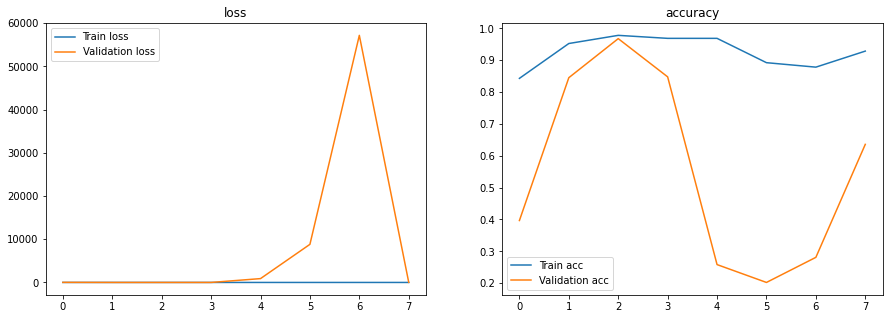

In [ ]:
plot_history(history)

In [ ]:
model_v3.evaluate(test_ds)

21/21 [==============================] - 6s 183ms/step - loss: 21.1947 - accuracy: 0.5942


[21.194698333740234, 0.5942028760910034]